In [4]:
import osmnx as ox

# 设置地图中心点和距离
center_point = (40.4237, -86.9212)  # Purdue 大学中心点
distance = 1500  # 1500 米半径

# 定义兴趣点类型，这里是饭店
tags = {'amenity': 'restaurant'}

# 获取饭店位置
restaurants = ox.geometries_from_point(center_point, tags, dist=distance)

# 打印饭店信息
print(restaurants[['element_type', 'osmid', 'name', 'geometry']])

C:\Users\Yuchen Du\AppData\Local\Temp\ipykernel_16092\3845516316.py:11: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  restaurants = ox.geometries_from_point(center_point, tags, dist=distance)


KeyError: "['element_type', 'osmid'] not in index"

In [5]:
import osmnx as ox

# 设置地图中心点和距离
center_point = (40.4237, -86.9212)  # Purdue 大学中心点
distance = 1500  # 1500 米半径

# 从 OSM 获取地图数据
purdue_graph = ox.graph_from_point(center_point, dist=distance, network_type='all')


In [6]:
# 定义兴趣点类型，这里是饭店
tags = {'amenity': 'restaurant'}

# 获取饭店位置
restaurants = ox.geometries_from_point(center_point, tags, dist=distance)

# 打印饭店信息
print(restaurants[['name', 'geometry']])

                                                  name  \
element_type osmid                                       
node         1312604380                      Blue Nile   
             1312604395             Mad Mushroom Pizza   
             1312604416                     Basil Thai   
             1718571600                   Hala's Grill   
             4747904128                           Yori   
             5495110048                    Lotsa Pizza   
             8023920890              Noodles & Company   
             8023920892                     Maru Sushi   
             8023920911                    Noodles & I   
             8103907707                        DAKSHIN   
             8648179267                    Happy China   
             8648179268                         O-ishi   
             9418236861     Walk On's Sports Bistreaux   
             9418236862                 Pizza and Parm   
             9418236863                   BBQ District   
             9

C:\Users\Yuchen Du\AppData\Local\Temp\ipykernel_16092\866716944.py:5: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  restaurants = ox.geometries_from_point(center_point, tags, dist=distance)


C:\Users\Yuchen Du\AppData\Local\Temp\ipykernel_16092\3484953909.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


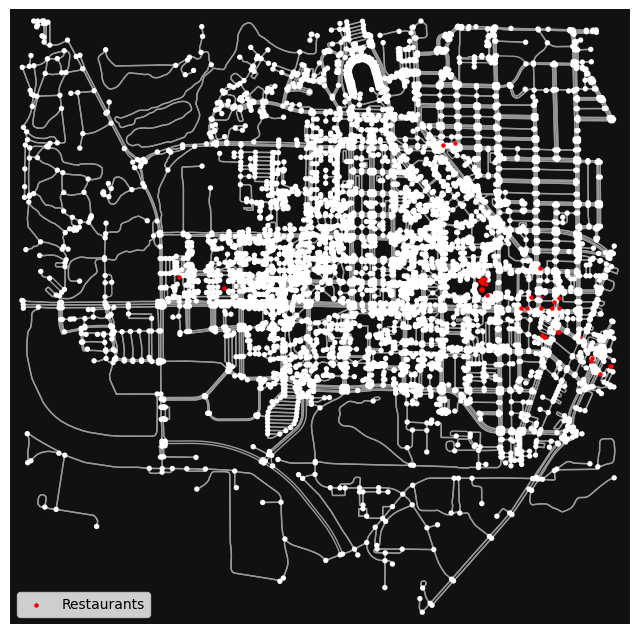

In [7]:
import matplotlib.pyplot as plt

# 创建地图
fig, ax = ox.plot_graph(purdue_graph, show=False, close=False)

# 将饭店位置添加到地图中
restaurants.plot(ax=ax, color='red', marker='o', markersize=5, label='Restaurants')

# 显示地图
plt.legend()
plt.show()

In [15]:
import networkx as nx

# 获取两个节点的位置
origin_node = ox.distance.nearest_nodes(purdue_graph, X=-86.9212, Y=40.4237)
destination_node = ox.distance.nearest_nodes(purdue_graph, X=-86.9200, Y=40.4240)

# 计算两个节点之间的最短路径距离
shortest_path_length = nx.shortest_path_length(purdue_graph, origin_node, destination_node, weight='length')
print(f"The shortest path distance is {shortest_path_length} meters.")

ImportError: scikit-learn must be installed to search an unprojected graph

In [14]:
import folium

# 创建 Folium 地图
purdue_map = folium.Map(location=center_point, zoom_start=15)

# 添加饭店标记
for idx, row in restaurants.iterrows():
    lat = row.geometry.y
    lng = row.geometry.x
    name = row.get('name', 'Restaurant')
    folium.Marker([lat, lng], tooltip=name).add_to(purdue_map)

# 保存地图为 HTML 文件
purdue_map.save('purdue_map.html')

AttributeError: 'Polygon' object has no attribute 'y'